<a href="https://colab.research.google.com/github/Sujan078BCT/Python-Programming/blob/main/session_9_oop_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Class Relationships

- Aggregation
- Inheritance

### Aggregation(Has-A relationship)
- one class owns the other class i.e one class is owner of another class.
- Technically, During creation of owner class object, other class object is passed as arguments in constructor of owner class.
- Owner class cannot access private attributes of other class. So, need to use getter or setter method (recommended) and _className__private_attributes(not recommended)
e.g:
```
class Customer:
  pass
class Address:
  pass

Customer has A Address i.e Customer class owns Adress class.
```

```
class Restaurant:
  pass
class Menu:
  pass

Restaurant has A Menu i.e Restaurant class owns menu class.
Relationship between Restaurant and Menu class is Has A relationship.
```

In [6]:
# example
class Customer: #owner class

  def __init__(self,name,gender,address):
    self.name = name # It is a simple text
    self.gender = gender # Either male or Female
    self.address = address # complex (country,state,city,street,email_address,phone_no,zip-code,pincode) -> make it as object

  def print_address(self):
    print(self.address.get_city(),self.address.pin,self.address.state)
    # print(self.address._Address__city,self.address.pin,self.address.state)

  def edit_profile(self,new_name,new_city,new_pin,new_state):
    self.name = new_name
    self.address.edit_address(new_city,new_pin,new_state)

class Address:

  def __init__(self,city,pin,state):
      self.__city = city
      self.pin = pin
      self.state = state

  def get_city(self):
    return self.__city

  def edit_address(self,new_city,new_pin,new_state):
    self.__city = new_city
    self.pin = new_pin
    self.state = new_state

add1 = Address('gurgaon',122011,'haryana')
# cust must have name 'nitish', gender 'male' and address of Address Class i.e add1
# passing object in Customer constructor.
cust = Customer('nitish','male',add1)

# cust = Customer('nitish','male',Address('guragaon',122011,'haryana'))

cust.print_address()

cust.edit_profile('ankit','mumbai',111111,'maharastra')
cust.print_address()
# method example
# what about private attribute

gurgaon 122011 haryana
mumbai 111111 maharastra


##### Aggregation class diagram
- Diamond or Rhombus sign is toward owner class.
- Customer Has A Address.

**Fig: Class Diagram of Aggregation.**

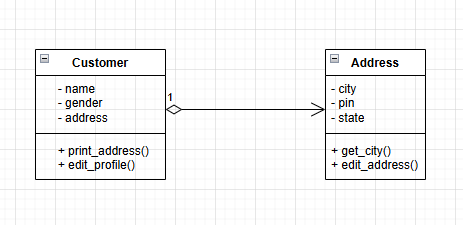

### Inheritance

- What is inheritance
- Example
- What gets inherited?

###**Inheritance and it's benefits**
- Code Reusability

In [7]:
# Example

# parent
class User:

  def __init__(self):
    self.name = 'nitish'
    self.gender = 'male'

  def login(self):
    print('login')

# child
class Student(User): # Student class inherited from User class

  def __init__(self):
    self.rollno = 100

  def enroll(self):
    print('enroll into the course')

u = User()
s = Student()

print(s.name)
s.login()
s.enroll()

#The error occured because __init__() i.e constructor method overwrites.

AttributeError: 'Student' object has no attribute 'name'

In [14]:
# Example

# parent
class User:

  def __init__(self):
    self.name = 'nitish'
    self.gender = 'male'

  def login(self):
    print('login')

# child
class Student(User): # Student class inherited from User class

  def __init__(self):
    self.rollno = 100
    super().__init__() # calling super class __init__ method

  def enroll(self):
    print('enroll into the course')

u = User()
s = Student()

print(s.name)
s.login()
s.enroll()

nitish
login
enroll into the course


In [ ]:
# Class diagram

##### What gets inherited?

- Constructor
- Non Private Attributes
- Non Private Methods

In [ ]:
# constructor example

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

s=SmartPhone(20000, "Apple", 13)
s.buy()

Inside phone constructor
Buying a phone


In [ ]:
# constructor example 2

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

class SmartPhone(Phone):
    def __init__(self, os, ram):
        self.os = os
        self.ram = ram
        print ("Inside SmartPhone constructor")

s=SmartPhone("Android", 2)
s.brand

Inside SmartPhone constructor


AttributeError: ignored

In [ ]:
# child can't access private members of the class

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    #getter
    def show(self):
        print (self.__price)

class SmartPhone(Phone):
    def check(self):
        print(self.__price)

s=SmartPhone(20000, "Apple", 13)
s.show()

Inside phone constructor
20000


In [ ]:
class Parent:

    def __init__(self,num):
        self.__num=num

    def get_num(self):
        return self.__num

class Child(Parent):

    def show(self):
        print("This is in child class")

son=Child(100)
print(son.get_num())
son.show()

100
This is in child class


In [ ]:
class Parent:

    def __init__(self,num):
        self.__num=num

    def get_num(self):
        return self.__num

class Child(Parent):

    def __init__(self,val,num):
        self.__val=val

    def get_val(self):
        return self.__val

son=Child(100,10)
print("Parent: Num:",son.get_num())
print("Child: Val:",son.get_val())

AttributeError: ignored

In [ ]:
class A:
    def __init__(self):
        self.var1=100

    def display1(self,var1):
        print("class A :", self.var1)
class B(A):

    def display2(self,var1):
        print("class B :", self.var1)

obj=B()
obj.display1(200)

class A : 200


In [ ]:
# Method Overriding
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor
Buying a smartphone


### Super Keyword

In [ ]:
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")
        # syntax to call parent ka buy method
        super().buy()

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor
Buying a smartphone
Buying a phone


In [ ]:
# using super outside the class
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")
        # syntax to call parent ka buy method
        super().buy()

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor


RuntimeError: ignored

In [ ]:
# can super access parent ka data?
# using super outside the class
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")
        # syntax to call parent ka buy method
        print(super().brand)

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor
Buying a smartphone


AttributeError: ignored

In [ ]:
# super -> constuctor
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

class SmartPhone(Phone):
    def __init__(self, price, brand, camera, os, ram):
        print('Inside smartphone constructor')
        super().__init__(price, brand, camera)
        self.os = os
        self.ram = ram
        print ("Inside smartphone constructor")

s=SmartPhone(20000, "Samsung", 12, "Android", 2)

print(s.os)
print(s.brand)

Inside smartphone constructor
Inside phone constructor
Inside smartphone constructor
Android
Samsung


##### Inheritance in summary

- A class can inherit from another class.

- Inheritance improves code reuse

- Constructor, attributes, methods get inherited to the child class

- The parent has no access to the child class

- Private properties of parent are not accessible directly in child class

- Child class can override the attributes or methods. This is called method overriding

- super() is an inbuilt function which is used to invoke the parent class methods and constructor

In [ ]:
class Parent:

    def __init__(self,num):
      self.__num=num

    def get_num(self):
      return self.__num

class Child(Parent):

    def __init__(self,num,val):
      super().__init__(num)
      self.__val=val

    def get_val(self):
      return self.__val

son=Child(100,200)
print(son.get_num())
print(son.get_val())

100
200


In [ ]:
class Parent:
    def __init__(self):
        self.num=100

class Child(Parent):

    def __init__(self):
        super().__init__()
        self.var=200

    def show(self):
        print(self.num)
        print(self.var)

son=Child()
son.show()

100
200


In [ ]:
class Parent:
    def __init__(self):
        self.__num=100

    def show(self):
        print("Parent:",self.__num)

class Child(Parent):
    def __init__(self):
        super().__init__()
        self.__var=10

    def show(self):
        print("Child:",self.__var)

obj=Child()
obj.show()

Child: 10


In [ ]:
class Parent:
    def __init__(self):
        self.__num=100

    def show(self):
        print("Parent:",self.__num)

class Child(Parent):
    def __init__(self):
        super().__init__()
        self.__var=10

    def show(self):
        print("Child:",self.__var)

obj=Child()
obj.show()

Child: 10


### Types of Inheritance

- Single Inheritance
- Multilevel Inheritance
- Hierarchical Inheritance
- Multiple Inheritance(Diamond Problem)
- Hybrid Inheritance

In [ ]:
# single inheritance
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

SmartPhone(1000,"Apple","13px").buy()

Inside phone constructor
Buying a phone


In [ ]:
# multilevel
class Product:
    def review(self):
        print ("Product customer review")

class Phone(Product):
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()
s.review()

Inside phone constructor
Buying a phone
Product customer review


In [ ]:
# Hierarchical
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

class FeaturePhone(Phone):
    pass

SmartPhone(1000,"Apple","13px").buy()
FeaturePhone(10,"Lava","1px").buy()

Inside phone constructor
Buying a phone
Inside phone constructor
Buying a phone


In [ ]:
# Multiple
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class Product:
    def review(self):
        print ("Customer review")

class SmartPhone(Phone, Product):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()
s.review()


Inside phone constructor
Buying a phone
Customer review


In [ ]:
# the diamond problem
# https://stackoverflow.com/questions/56361048/what-is-the-diamond-problem-in-python-and-why-its-not-appear-in-python2
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class Product:
    def buy(self):
        print ("Product buy method")

# Method resolution order
class SmartPhone(Phone,Product):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()

Inside phone constructor
Buying a phone


In [ ]:
class A:

    def m1(self):
        return 20

class B(A):

    def m1(self):
        return 30

    def m2(self):
        return 40

class C(B):

    def m2(self):
        return 20
obj1=A()
obj2=B()
obj3=C()
print(obj1.m1() + obj3.m1()+ obj3.m2())

70


In [ ]:
class A:

    def m1(self):
        return 20

class B(A):

    def m1(self):
        val=super().m1()+30
        return val

class C(B):

    def m1(self):
        val=self.m1()+20
        return val
obj=C()
print(obj.m1())

RecursionError: ignored

### Polymorphism

- Method Overriding
- Method Overloading
- Operator Overloading

In [ ]:
class Shape:

  def area(self,a,b=0):
    if b == 0:
      return 3.14*a*a
    else:
      return a*b

s = Shape()

print(s.area(2))
print(s.area(3,4))

12.56
12


In [ ]:
'hello' + 'world'

'helloworld'

In [ ]:
4 + 5

9

In [ ]:
[1,2,3] + [4,5]

[1, 2, 3, 4, 5]

### Abstraction

In [ ]:
from abc import ABC,abstractmethod
class BankApp(ABC):

  def database(self):
    print('connected to database')

  @abstractmethod
  def security(self):
    pass

  @abstractmethod
  def display(self):
    pass


In [ ]:
class MobileApp(BankApp):

  def mobile_login(self):
    print('login into mobile')

  def security(self):
    print('mobile security')

  def display(self):
    print('display')

In [ ]:
mob = MobileApp()

In [ ]:
mob.security()

mobile security


In [ ]:
obj = BankApp()

TypeError: ignored